In [1]:
import warnings

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)



Coefficients from SKLEARN: 
 [[2.00989895]]

Intercept from SKLEARN: 
 [0.5454926]

Coefficients from Gradient Descent Algorithm: 
 2.0098243476338116

Intercept from Gradient Descent Algorithm: 
 0.5455304168659654


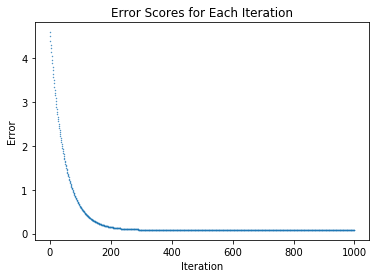

In [2]:
# Cost function for the linear regression that we will try to optimize
def LR_cost_function (alpha, beta, x, y):
    '''Return the cost for a given line and data
    
    Alpha and beta are the coefficients that describe the fit line, while 
    x and y are lists of arrays with the x and y value of each data point'''
    
    error = 0
    n = len(x)
    for i in range(n):
        point_error = (y[i] - (alpha + beta * x[i])) ** 2
        error += point_error
    return error / n


# Function we will call each iteration of the gradient algorithm
def step (alpha_cur, beta_cur, learning_rate, x, y):
    '''Move downhill from a current cost function to a new, more optimal one'''
    alpha = 0
    beta = 0
    n = len(x)
    for i in range(n):
        # Partial derivative of the intercept
        point_alpha = -(2 / n) * (y[i] - ((alpha_cur + beta_cur * x[i])))
        alpha += point_alpha
        
        # Partial derivative of the slope
        point_beta = -(2 / n) * x[i] * (y[i] - ((alpha_cur + beta_cur * x[i])))
        beta += point_beta
        
    new_alpha = alpha_cur - learning_rate * alpha
    new_beta = beta_cur - learning_rate * beta
    return [new_alpha, new_beta]

# These constants correspond to the decision points described above

# How many steps to take
stop = 1000

# How far to move with each step
learning_rate = 0.005

# Starting values for intercept and slope
alpha_start = 0
beta_start = 0

# Generate random data
x = np.random.normal(0, 1, 100)
y = x * 2 + np.random.sample(100)

# Fit a true minimum regression using solved equations
regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1, 1), y.reshape(-1, 1))

print('\nCoefficients from SKLEARN: \n', regr.coef_)
print('\nIntercept from SKLEARN: \n', regr.intercept_)

# Now fit an iteravely optimized regression using your custom 
# Gradient Descent algorithm

# Store each iteration for later inspection
all_error = []

# Provide starting values
alpha = alpha_start
beta = beta_start

# Run the algorithm
for iter in range(stop):
    # Take a step, assigning the results of our step function to feed into
    # the next step.
    alpha, beta = step(alpha, beta, learning_rate, x, y)
    
    # Calculate the error
    error = LR_cost_function(alpha, beta, x, y)
    
    # Store the error to inspect later
    all_error.append(error)      


print('\nCoefficients from Gradient Descent Algorithm: \n', beta)
print('\nIntercept from Gradient Descent Algorithm: \n', alpha)

plt.plot(all_error, 'o', ms = 0.4)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error Scores for Each Iteration')
plt.show()


Coefficients from Gradient Descent Algorithm: 
 2.009898944503063

Intercept from Gradient Descent Algorithm: 
 0.5454926056794661


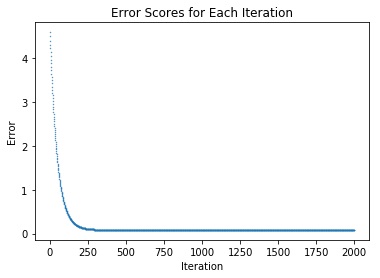

In [3]:
# How many steps to take
stop = 1000

# Run the algorithm
for iter in range(stop):
    # Take a step, assigning the results of our step function to feed into
    # the next step.
    alpha, beta = step(alpha, beta, learning_rate, x, y)
    
    # Calculate the error
    error = LR_cost_function(alpha, beta, x, y)
    
    # Store the error to inspect later
    all_error.append(error)
    
# Add a stopping threshold
errors = []
for a in all_error:
    for b in all_error:
        if (a - b) >= 0.001:
            errors.append(a)


print('\nCoefficients from Gradient Descent Algorithm: \n', beta)
print('\nIntercept from Gradient Descent Algorithm: \n', alpha)

plt.plot(all_error, 'o', ms = 0.4)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error Scores for Each Iteration')
plt.show()


Coefficients from Gradient Descent Algorithm: 
 2.0098989492583215

Intercept from Gradient Descent Algorithm: 
 0.5454926009824611


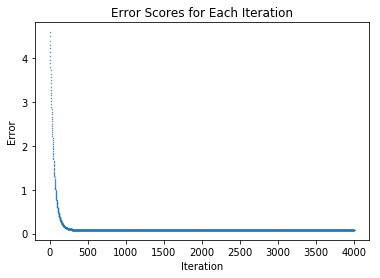

In [5]:
# How many steps to take
stop = 1000

# Run the algorithm
for iter in range(stop):
    # Take a step, assigning the results of our step function to feed into
    # the next step.
    alpha, beta = step(alpha, beta, learning_rate, x, y)
    
    # Calculate the error
    error = LR_cost_function(alpha, beta, x, y)
    
    # Store the error to inspect later
    all_error.append(error)
    
# Add a stopping threshold
errors = []
for a in all_error:
    for b in all_error:
        if (a - b) >= 0.5:
            errors.append(a)


print('\nCoefficients from Gradient Descent Algorithm: \n', beta)
print('\nIntercept from Gradient Descent Algorithm: \n', alpha)

plt.plot(all_error, 'o', ms = 0.4)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error Scores for Each Iteration')
plt.show()